In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [13]:
url = 'https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/CustomerSegmentationClassification.csv'
df=pd.read_csv(url)
df.sample(20) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
218,462934,Male,Yes,56,No,Executive,NaN,High,2.0,Cat_6,A
5055,467403,Female,Yes,38,Yes,Artist,7.0,Average,3.0,Cat_4,B
299,461607,Female,Yes,40,Yes,Entertainment,7.0,Average,2.0,Cat_3,B
2157,461603,Male,No,39,Yes,Artist,NaN,Low,1.0,Cat_6,C
340,464306,Male,No,29,Yes,Artist,3.0,Low,1.0,Cat_6,B
7372,463611,Male,No,62,Yes,Artist,0.0,Low,NaN,Cat_6,A
3063,467006,Female,No,73,Yes,Lawyer,0.0,Low,1.0,Cat_6,B
5454,463660,Male,Yes,85,Yes,Lawyer,1.0,Low,1.0,Cat_6,A
7270,460267,Female,No,27,Yes,Healthcare,1.0,Low,9.0,Cat_6,C
2141,460049,Male,Yes,43,Yes,Entertainment,0.0,Average,2.0,Cat_5,A


In [14]:
df.info() #ดูภาพรวมข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.4+ KB


In [15]:
df.columns #แสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [16]:
#โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ระหว่าง อายุ(Age) ขนาดครอบครัว(Family_size)ได้ดังนี้

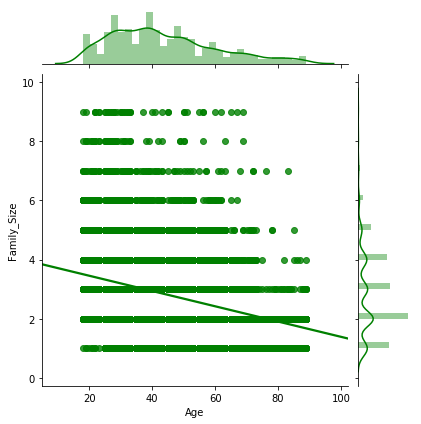

In [17]:
sns.jointplot(x='Age', y='Family_Size', data=df, kind='reg', ci=None,
              color='green');

In [18]:
#สร้าง Logistic Regression model โดยใช้ library ของ scikit learn นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['Age']]
y=df['Family_Size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
X_train

,Age
7702,49
5704,18
1948,70
4355,27
4111,23
2649,20
1072,27
7223,19
3735,45
7989,49
